In [1]:
%matplotlib inline

from dicom_utils import main
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af
from skimage import morphology

In [2]:
# Folder has to be in format "Subject_ID -> CT and RTSTRUCT (all captial)"
dicom_dir = "1"
output_dir = "Output"
images, slices, contours, labels, dummy_mask = main(dicom_dir, output_dir)

In [3]:
contour_table = pd.DataFrame()
number = []
name = []
for i in range(24):
    number.append(contours[i]["number"])
    name.append(contours[i]["name"])
#contour_table["number"] = number
contour_table["name"] = name

In [4]:
contour_table

,name
0,marked iso
1,a prostate
2,b SV
3,PTV
4,d rectum
5,e bladder
6,f Femural Heads
7,g nt avoid
8,fiducials
9,p ring


# prostate

In [5]:
#Find location of the contour where labels == 1 (prostate)
a = np.argwhere(labels==True)
a[a[..., 3] == 1][0]

array([ 63, 246, 245,   1], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

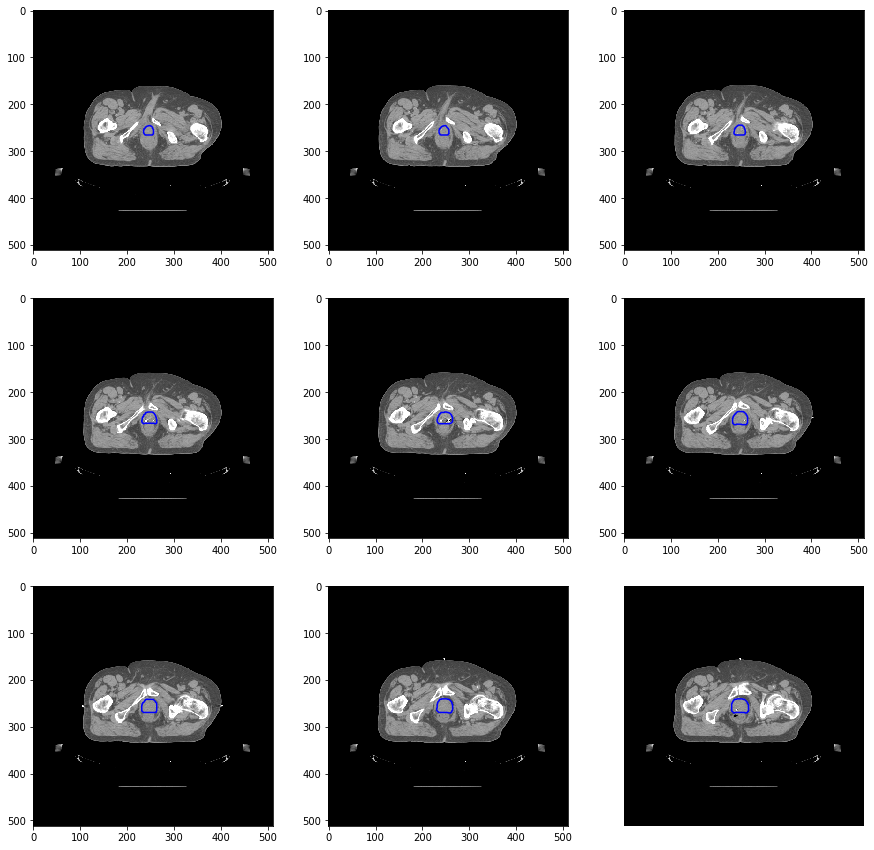

In [10]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 1][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# rectum

In [6]:
#Find location of the contour where labels == 4 (rectum)
a = np.argwhere(labels==True)
a[a[..., 3] == 4][0]

array([ 55, 280, 246,   4], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

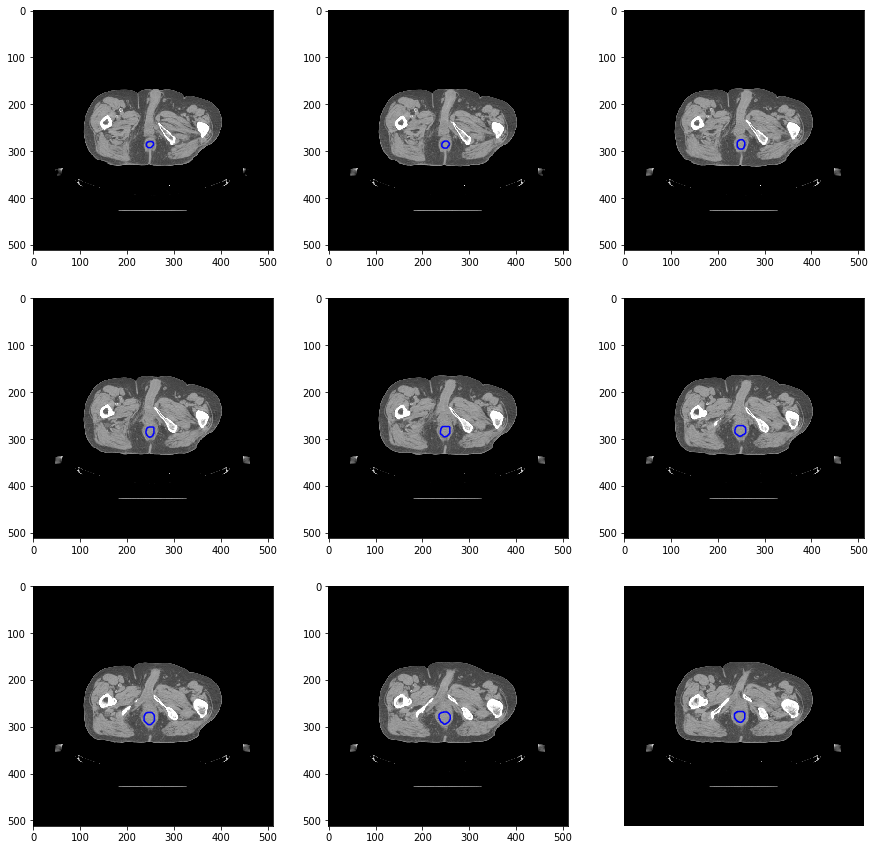

In [11]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 55, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 4][i + 55, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# bladder

In [13]:
#Find location of the contour where labels == 5 (bladder)
a = np.argwhere(labels==True)
a[a[..., 3] == 5][0]

array([ 73, 231, 250,   5], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

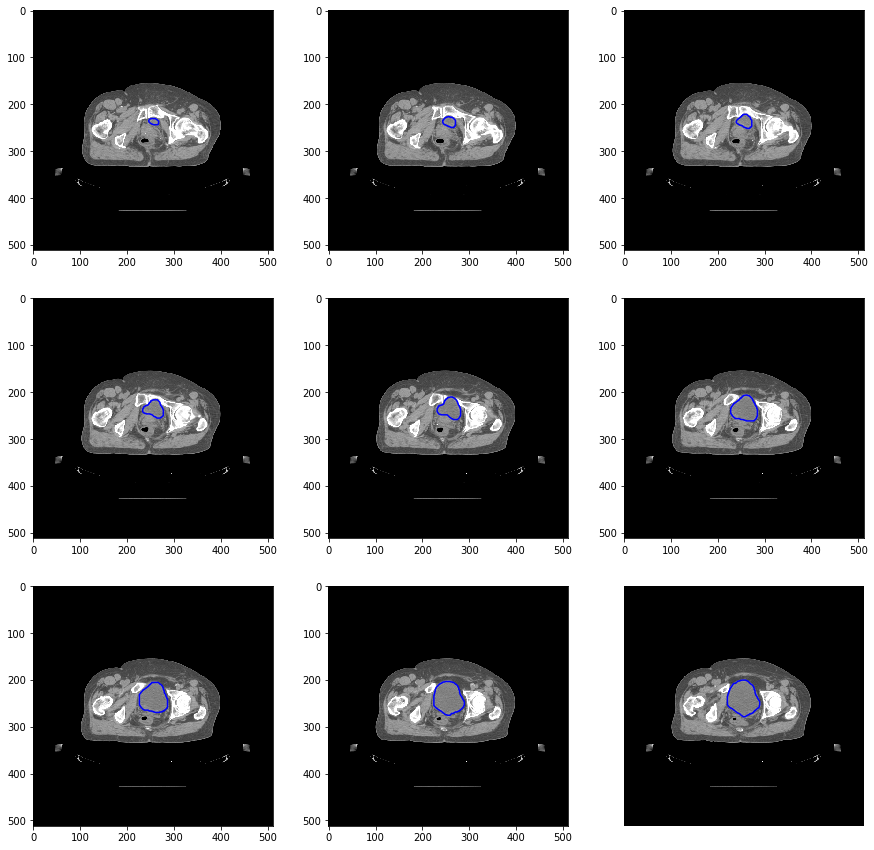

In [12]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 73, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 5][i + 73, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# Seminal vesicles

In [8]:
#Find location of the contour where labels == 2 (Seminal vesicles)
a = np.argwhere(labels==True)
a[a[..., 3] == 2][0]

array([ 77, 266, 234,   2], dtype=int64)

C:\Users\73707\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


(-0.5, 511.5, 511.5, -0.5)

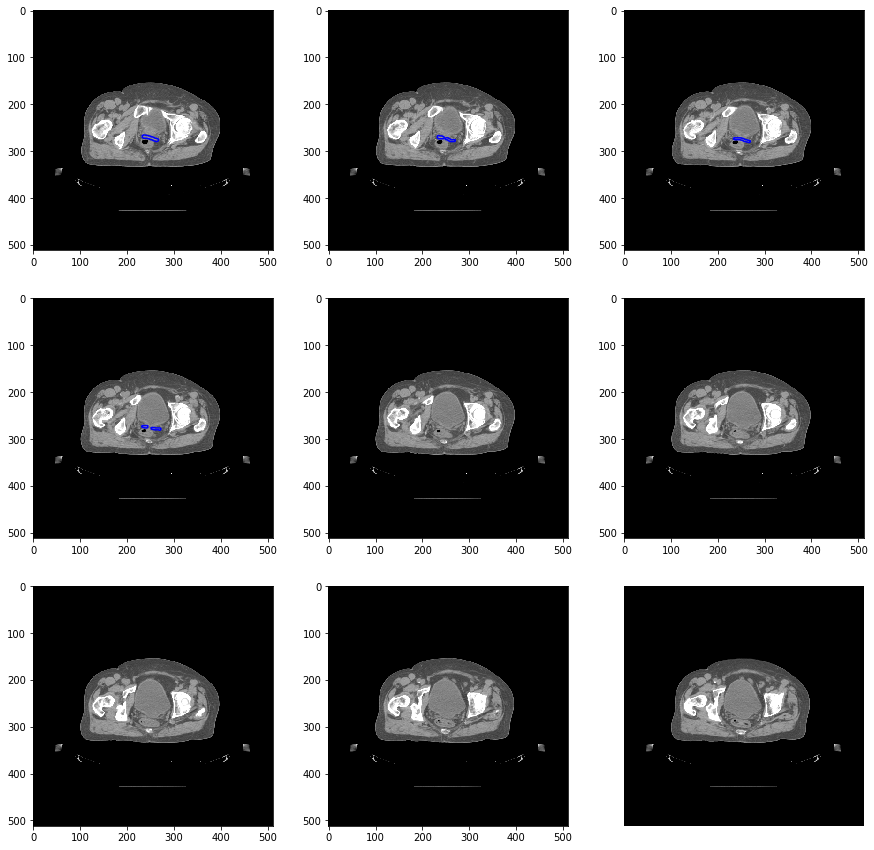

In [14]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 77, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 2][i + 77, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# Femural Heads

In [16]:
#Find location of the contour where labels == 4 (Femural Heads)
a = np.argwhere(labels==True)
a[a[..., 3] == 6][0]

array([ 60, 235, 148,   6], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

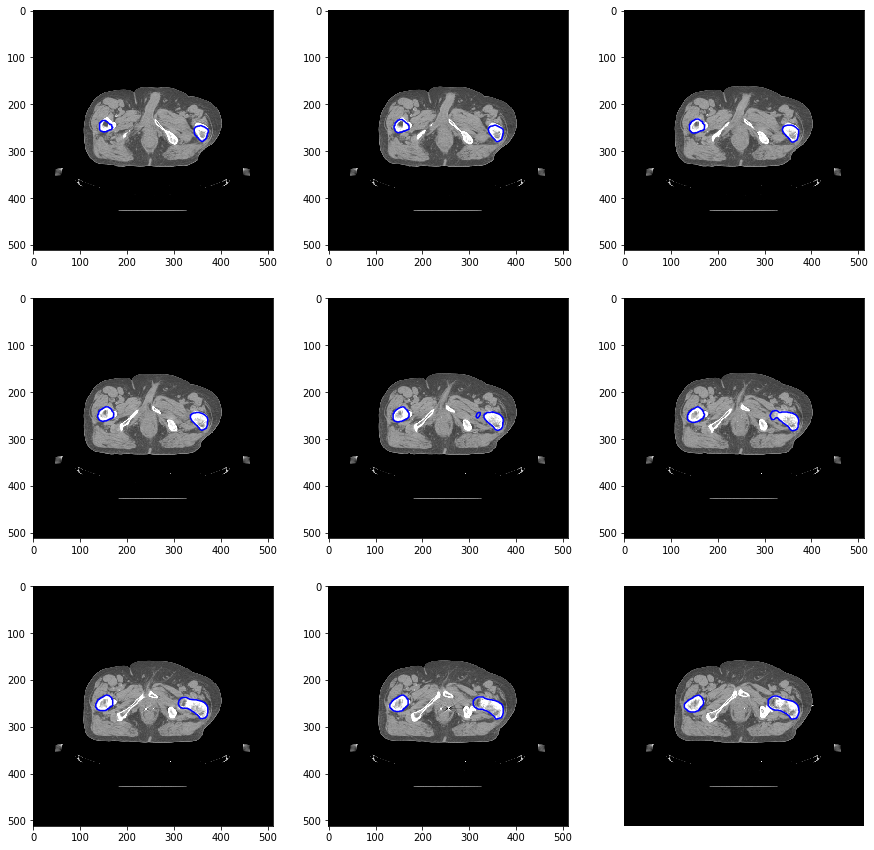

In [17]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 60, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 6][i + 60, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# prostate

# Sobel and 3D Permutation

In [13]:
a = np.argwhere(labels==True)
a[a[..., 3] == 1][0]

array([ 63, 246, 245,   1], dtype=int64)

In [4]:
target_img1 = images[75, ...]
target_label1 = labels[..., 1][75, ...]

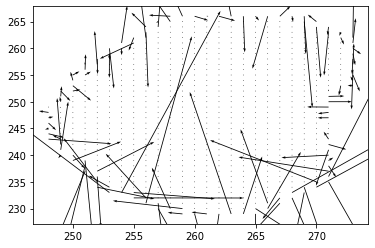

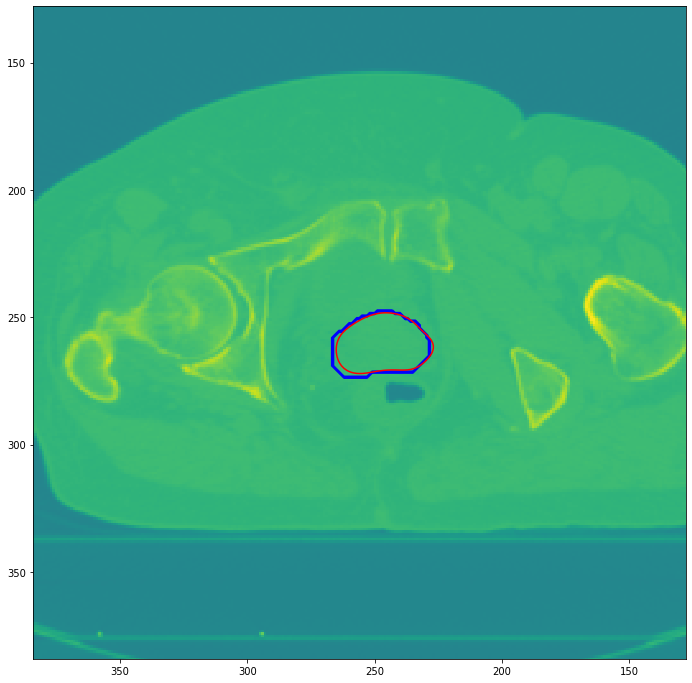

In [5]:
import assd_func_Sobel as af_Sobel
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 20
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 1
seed=123
dx, dy, mask, t, L = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
du_1 = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=True, plot=True, display=True)
du_1 = np.where(du_1 < 0.5, 0, 4)

In [27]:
frontal_target_img = images[0:100, 250, 0:512]
frontal_target_label = labels[..., 1][0:100, 250, 0:512]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(frontal_target_img, frontal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
frontal_du = af_Sobel.plotting_assd(dx, dy, mask, frontal_target_img, quiver=False, plot=False, display=False)
frontal_du = np.where(frontal_du < 0.5, 0, 4)

In [28]:
sagittal_target_img = images[0:90, 0:512, 260]
sagittal_target_label = labels[..., 1][0:90, 0:512, 260]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(sagittal_target_img, sagittal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
sagittal_du = af_Sobel.plotting_assd(dx, dy, mask, sagittal_target_img, quiver=False, plot=False, display=False)
sagittal_du = np.where(sagittal_du < 0.5, 0, 4)

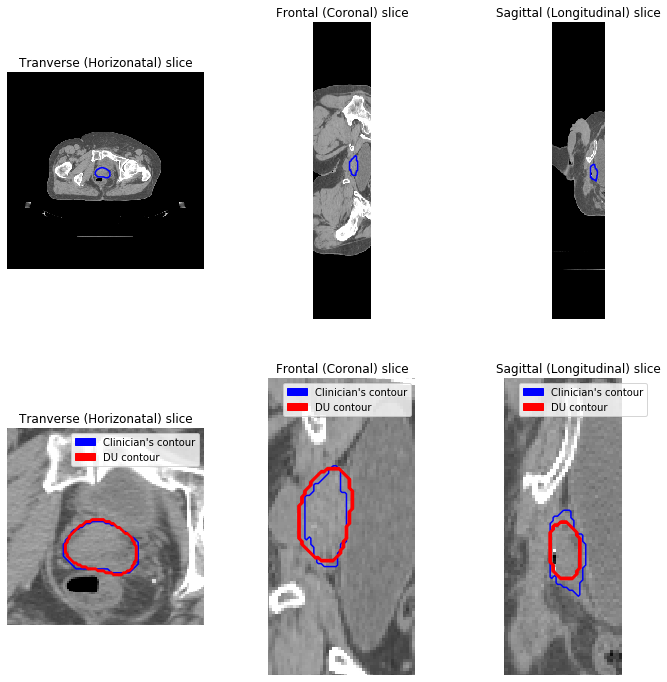

In [29]:
blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
red_patch = mpatches.Patch(color='red', label='DU contour')


fig, ax = plt.subplots(2, 3, figsize=[12, 12])

ax[0, 0].set_title("Tranverse (Horizonatal) slice")
ax[0, 0].imshow(target_img1, cmap='gray', vmin=-250, vmax=250)
ax[0, 0].contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Frontal (Coronal) slice")
ax[0, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Sagittal (Longitudinal) slice")
ax[0, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img1, cmap='gray', vmin=-250, vmax=250)
ax[1, 0].contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 0].contour(du_1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(200, 300)
ax[1, 0].set_ylim(300, 200)
ax[1, 0].legend(handles=[ blue_patch, red_patch])
ax[1, 0].axis('off')

ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 1].contour(frontal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(50, 100)
ax[1, 1].set_ylim(300, 200)
ax[1, 1].legend(handles=[ blue_patch, red_patch])
ax[1, 1].axis('off')

ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 2].contour(sagittal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(50, 100)
ax[1, 2].set_ylim(300, 200)
ax[1, 2].legend(handles=[ blue_patch, red_patch])
ax[1, 2].axis('off')

plt.show()

# testing on different slices

In [6]:
assd_contour = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L = af_Sobel.assd_Sobel(images[65 + i, ...], labels[..., 1][65 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
        du_2 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour)

(200.0, 300.0, 300.0, 200.0)

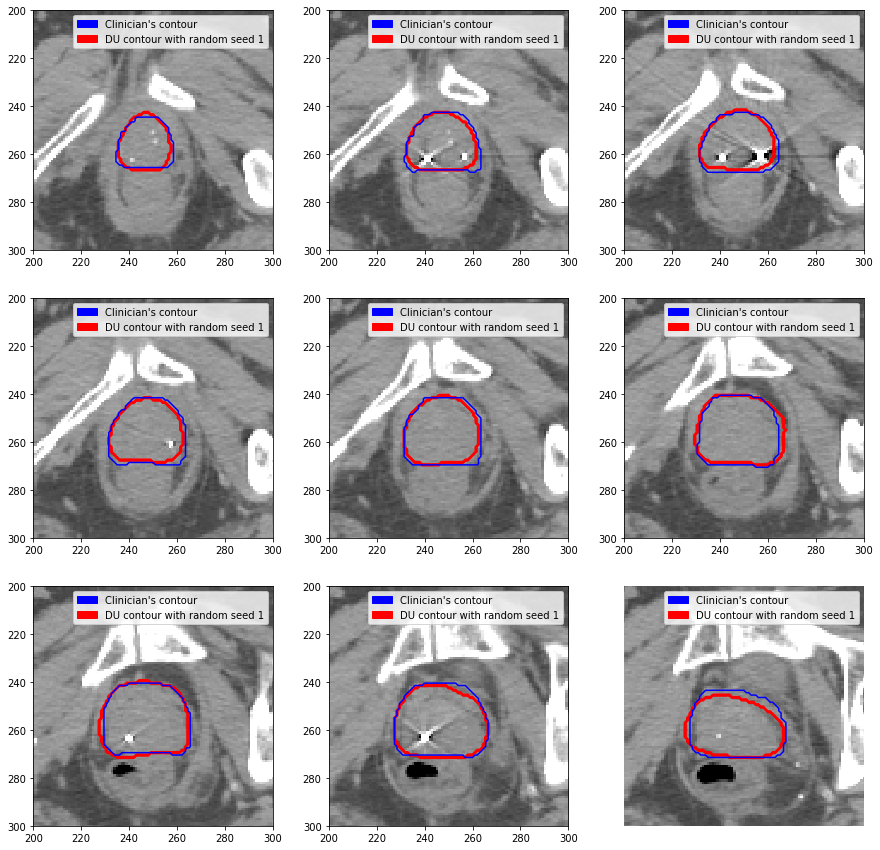

In [7]:
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[65 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 1][65 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

# rectum

# Sobel and 3D Permutation

In [14]:
a = np.argwhere(labels==True)
a[a[..., 3] == 4][0]

array([ 55, 280, 246,   4], dtype=int64)

In [17]:
target_img2 = images[55, ...]
target_label2 = labels[..., 4][55, ...]

In [18]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 20
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 4
seed=123
dx, dy, mask, t, L = af_Sobel.assd_Sobel(target_img2, target_label2, voxelsize, a, SD, circles, seed, k, w, images, labels, 4, smooth=True)
du_2 = af_Sobel.plotting_assd(dx, dy, mask, target_img2, quiver=True, plot=True, display=True)
du_2 = np.where(du_2 < 0.5, 0, 4)

ValueError: min() arg is an empty sequence

In [ ]:
frontal_target_img = images[0:100, 250, 0:512]
frontal_target_label = labels[..., 4][0:100, 250, 0:512]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(frontal_target_img, frontal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 4, smooth=True)
frontal_du = af_Sobel.plotting_assd(dx, dy, mask, frontal_target_img, quiver=False, plot=False, display=False)
frontal_du = np.where(frontal_du < 0.5, 0, 4)

In [ ]:
sagittal_target_img = images[0:90, 0:512, 260]
sagittal_target_label = labels[..., 4][0:90, 0:512, 260]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(sagittal_target_img, sagittal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 4, smooth=True)
sagittal_du = af_Sobel.plotting_assd(dx, dy, mask, sagittal_target_img, quiver=False, plot=False, display=False)
sagittal_du = np.where(sagittal_du < 0.5, 0, 4)

In [ ]:
blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
red_patch = mpatches.Patch(color='red', label='DU contour')


fig, ax = plt.subplots(2, 3, figsize=[12, 12])

ax[0, 0].set_title("Tranverse (Horizonatal) slice")
ax[0, 0].imshow(target_img2, cmap='gray', vmin=-250, vmax=250)
ax[0, 0].contour(target_label2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Frontal (Coronal) slice")
ax[0, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Sagittal (Longitudinal) slice")
ax[0, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img2, cmap='gray', vmin=-250, vmax=250)
ax[1, 0].contour(target_label2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 0].contour(du_2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(200, 300)
ax[1, 0].set_ylim(300, 200)
ax[1, 0].legend(handles=[ blue_patch, red_patch])
ax[1, 0].axis('off')

ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 1].contour(frontal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(50, 100)
ax[1, 1].set_ylim(300, 200)
ax[1, 1].legend(handles=[ blue_patch, red_patch])
ax[1, 1].axis('off')

ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 2].contour(sagittal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(50, 100)
ax[1, 2].set_ylim(300, 200)
ax[1, 2].legend(handles=[ blue_patch, red_patch])
ax[1, 2].axis('off')

plt.show()

# testing on different slices

In [ ]:
assd_contour = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L = af_Sobel.assd_Sobel(images[55 + i, ...], labels[..., 4][55 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
        du_2 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour)

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[55 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 1][65 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

# bladder

# Sobel and 3D Permutation

In [19]:
a = np.argwhere(labels==True)
a[a[..., 3] == 5][0]

array([ 73, 231, 250,   5], dtype=int64)

In [10]:
target_img3 = images[73, ...]
target_label3 = labels[..., 5][73, ...]

In [11]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 20
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 5
seed=123
dx, dy, mask, t, L = af_Sobel.assd_Sobel(target_img3, target_label3, voxelsize, a, SD, circles, seed, k, w, images, labels, 5, smooth=True)
du_3 = af_Sobel.plotting_assd(dx, dy, mask, target_img3, quiver=True, plot=True, display=True)
du_3 = np.where(du_2 < 0.5, 0, 4)

ValueError: min() arg is an empty sequence

In [ ]:
frontal_target_img = images[0:100, 250, 0:512]
frontal_target_label = labels[..., 5][0:100, 250, 0:512]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(frontal_target_img, frontal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 5, smooth=True)
frontal_du = af_Sobel.plotting_assd(dx, dy, mask, frontal_target_img, quiver=False, plot=False, display=False)
frontal_du = np.where(frontal_du < 0.5, 0, 4)

In [ ]:
sagittal_target_img = images[0:90, 0:512, 260]
sagittal_target_label = labels[..., 5][0:90, 0:512, 260]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(sagittal_target_img, sagittal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 5, smooth=True)
sagittal_du = af_Sobel.plotting_assd(dx, dy, mask, sagittal_target_img, quiver=False, plot=False, display=False)
sagittal_du = np.where(sagittal_du < 0.5, 0, 4)

In [ ]:
blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
red_patch = mpatches.Patch(color='red', label='DU contour')


fig, ax = plt.subplots(2, 3, figsize=[12, 12])

ax[0, 0].set_title("Tranverse (Horizonatal) slice")
ax[0, 0].imshow(target_img3, cmap='gray', vmin=-250, vmax=250)
ax[0, 0].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Frontal (Coronal) slice")
ax[0, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Sagittal (Longitudinal) slice")
ax[0, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img3, cmap='gray', vmin=-250, vmax=250)
ax[1, 0].contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 0].contour(du_1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(200, 300)
ax[1, 0].set_ylim(300, 200)
ax[1, 0].legend(handles=[ blue_patch, red_patch])
ax[1, 0].axis('off')

ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 1].contour(frontal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(50, 100)
ax[1, 1].set_ylim(300, 200)
ax[1, 1].legend(handles=[ blue_patch, red_patch])
ax[1, 1].axis('off')

ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 2].contour(sagittal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(50, 100)
ax[1, 2].set_ylim(300, 200)
ax[1, 2].legend(handles=[ blue_patch, red_patch])
ax[1, 2].axis('off')

plt.show()

# testing on different slices

In [ ]:
assd_contour = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L = af_Sobel.assd_Sobel(images[73 + i, ...], labels[..., 5][73 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img3, quiver=False, plot=False)
        du_3 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_3)) #surface
assd_contour = np.array(assd_contour)

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[73 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 5][65 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

# Seminal vesicles

# Sobel and 3D Permutation

In [20]:
a = np.argwhere(labels==True)
a[a[..., 3] == 2][0]

array([ 77, 266, 234,   2], dtype=int64)

In [21]:
target_img4 = images[77, ...]
target_label4 = labels[..., 2][77, ...]

In [ ]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 20
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 2
seed=123
dx, dy, mask, t, L = af_Sobel.assd_Sobel(target_img4, target_label4, voxelsize, a, SD, circles, seed, k, w, images, labels, 2, smooth=True)
du_4 = af_Sobel.plotting_assd(dx, dy, mask, target_img4, quiver=True, plot=True, display=True)
du_4 = np.where(du_4 < 0.5, 0, 4)

In [ ]:
frontal_target_img = images[0:100, 250, 0:512]
frontal_target_label = labels[..., 2][0:100, 250, 0:512]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(frontal_target_img, frontal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 2, smooth=True)
frontal_du = af_Sobel.plotting_assd(dx, dy, mask, frontal_target_img, quiver=False, plot=False, display=False)
frontal_du = np.where(frontal_du < 0.5, 0, 4)

In [ ]:
sagittal_target_img = images[0:90, 0:512, 260]
sagittal_target_label = labels[..., 2][0:90, 0:512, 260]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(sagittal_target_img, sagittal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 2, smooth=True)
sagittal_du = af_Sobel.plotting_assd(dx, dy, mask, sagittal_target_img, quiver=False, plot=False, display=False)
sagittal_du = np.where(sagittal_du < 0.5, 0, 4)

In [ ]:
blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
red_patch = mpatches.Patch(color='red', label='DU contour')


fig, ax = plt.subplots(2, 3, figsize=[12, 12])

ax[0, 0].set_title("Tranverse (Horizonatal) slice")
ax[0, 0].imshow(target_img4, cmap='gray', vmin=-250, vmax=250)
ax[0, 0].contour(target_label4, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Frontal (Coronal) slice")
ax[0, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Sagittal (Longitudinal) slice")
ax[0, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img4, cmap='gray', vmin=-250, vmax=250)
ax[1, 0].contour(target_label4, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 0].contour(du_1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(200, 300)
ax[1, 0].set_ylim(300, 200)
ax[1, 0].legend(handles=[ blue_patch, red_patch])
ax[1, 0].axis('off')

ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 1].contour(frontal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(50, 100)
ax[1, 1].set_ylim(300, 200)
ax[1, 1].legend(handles=[ blue_patch, red_patch])
ax[1, 1].axis('off')

ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 2].contour(sagittal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(50, 100)
ax[1, 2].set_ylim(300, 200)
ax[1, 2].legend(handles=[ blue_patch, red_patch])
ax[1, 2].axis('off')

plt.show()

# testing on different slices

In [ ]:
assd_contour = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L = af_Sobel.assd_Sobel(images[77 + i, ...], labels[..., 2][77 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 1, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img4, quiver=False, plot=False)
        du_4 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_4)) #surface
assd_contour = np.array(assd_contour)

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[73 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 5][65 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

# Femural Heads

# Sobel and 3D Permutation

In [22]:
a = np.argwhere(labels==True)
a[a[..., 3] == 6][0]

array([ 60, 235, 148,   6], dtype=int64)

In [ ]:
target_img5 = images[60, ...]
target_label5 = labels[..., 6][60, ...]

In [ ]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 20
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_i = 6
seed=123
dx, dy, mask, t, L = af_Sobel.assd_Sobel(target_img5, target_label5, voxelsize, a, SD, circles, seed, k, w, images, labels, 6, smooth=True)
du_5 = af_Sobel.plotting_assd(dx, dy, mask, target_img5, quiver=True, plot=True, display=True)
du_5 = np.where(du_4 < 0.5, 0, 4)

In [ ]:
frontal_target_img = images[0:100, 250, 0:512]
frontal_target_label = labels[..., 6][0:100, 250, 0:512]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(frontal_target_img, frontal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 6, smooth=True)
frontal_du = af_Sobel.plotting_assd(dx, dy, mask, frontal_target_img, quiver=False, plot=False, display=False)
frontal_du = np.where(frontal_du < 0.5, 0, 4)

In [ ]:
sagittal_target_img = images[0:90, 0:512, 260]
sagittal_target_label = labels[..., 6][0:90, 0:512, 260]
dx, dy, mask, t, L = af_Sobel.assd_Sobel(sagittal_target_img, sagittal_target_label, voxelsize, a, SD, circles, seed, k, w, images, labels, 6, smooth=True)
sagittal_du = af_Sobel.plotting_assd(dx, dy, mask, sagittal_target_img, quiver=False, plot=False, display=False)
sagittal_du = np.where(sagittal_du < 0.5, 0, 4)

In [ ]:
blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
red_patch = mpatches.Patch(color='red', label='DU contour')


fig, ax = plt.subplots(2, 3, figsize=[12, 12])

ax[0, 0].set_title("Tranverse (Horizonatal) slice")
ax[0, 0].imshow(target_img5, cmap='gray', vmin=-250, vmax=250)
ax[0, 0].contour(target_label5, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 0].set_xlabel("Orginal contour")
ax[0, 0].axis('off')

ax[0, 1].set_title("Frontal (Coronal) slice")
ax[0, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 1].set_xlabel("Orginal contour")
ax[0, 1].axis('off')

ax[0, 2].set_title("Sagittal (Longitudinal) slice")
ax[0, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[0, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[0, 2].set_xlabel("Orginal contour")
ax[0, 2].axis('off')

ax[1, 0].set_title("Tranverse (Horizonatal) slice")
ax[1, 0].imshow(target_img5, cmap='gray', vmin=-250, vmax=250)
ax[1, 0].contour(target_label5, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 0].contour(du_5, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 0].set_xlabel("DU contour")
ax[1, 0].set_xlim(200, 300)
ax[1, 0].set_ylim(300, 200)
ax[1, 0].legend(handles=[ blue_patch, red_patch])
ax[1, 0].axis('off')

ax[1, 1].set_title("Frontal (Coronal) slice")
ax[1, 1].imshow(frontal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 1].contour(frontal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 1].contour(frontal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 1].set_xlabel("DU contour")
ax[1, 1].set_xlim(50, 100)
ax[1, 1].set_ylim(300, 200)
ax[1, 1].legend(handles=[ blue_patch, red_patch])
ax[1, 1].axis('off')

ax[1, 2].set_title("Sagittal (Longitudinal) slice")
ax[1, 2].imshow(sagittal_target_img.transpose(), cmap='gray', vmin=-250, vmax=250)
ax[1, 2].contour(sagittal_target_label.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='blue')
ax[1, 2].contour(sagittal_du.transpose(), levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors='red')
ax[1, 2].set_xlabel("DU contour")
ax[1, 2].set_xlim(50, 100)
ax[1, 2].set_ylim(300, 200)
ax[1, 2].legend(handles=[ blue_patch, red_patch])
ax[1, 2].axis('off')

plt.show()

# testing on different slices

In [ ]:
assd_contour = []

for i in range(12):
    if i != 7:
        dx, dy, mask, t, L = af_Sobel.assd_Sobel(images[60 + i, ...], labels[..., 6][60 + i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, 6, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img5, quiver=False, plot=False)
        du_5 = np.where(du < 0.5, 0, 4)
        assd_contour.append(list(du_5)) #surface
assd_contour = np.array(assd_contour)

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[60 + i , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour[i, ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels[..., 6][60 + i, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')